# Random Walks in Various Dimensions
### Noah Chavez 10/7/2023

## 1D

First import some packages

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

Now we can write a 1D random walk easily. We can describe the current step of the walk using just one integer. Then, for each step there is an equal chance of moving in either direction. We using a Mersenne Twister to generate pseudo random numbers to "pick" the next step.

In [3]:
#a function to calculate average distance from the origin for a random walk of N steps
def walk_distance(number_of_steps: int, display_plot: bool) -> float:

    #intialize some values
    current_step = 0
    position = 0 #init position to the origin
    pos_history = np.array([0])

    #pick a random direction (left or right) and move that way
    while(current_step < number_of_steps):
        current_step += 1
        random_number = random.randint(0,1)
        if(random_number == 0):
            position += 1
        else:
            position -= 1
        pos_history = np.append(pos_history,position) #store the new current position


    if(display_plot):
        #now plot it
        print([step for step in np.arange(number_of_steps+1)])
        print([pos_history[step] for step in np.arange(number_of_steps+1)])
        plt.plot([step for step in np.arange(number_of_steps+1)], [pos_history[step] for step in np.arange(number_of_steps+1)],color="blue")
        plt.axhline(y=0,color="black")

    #print("Distance upon termination is: %s" % abs(position))
    return abs(position)


Now we can do some stats or just plot some runs out

In [4]:
def avg_distance(number_of_steps: int, number_of_trials:int) -> float:
    avg_dist = 0
    for run in np.arange(number_of_trials):
        avg_dist += walk_distance(number_of_steps,False)

    avg_dist = avg_dist / number_of_trials
    return avg_dist

    
number_of_steps = 1000 #1000
number_of_trials = 1000  #1000
#res = avg_distance(number_of_steps,number_of_trials)
#print("The average distance upon termination is: %s" % res)

logspacing = 50
#datax
steps = [int(step) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
#datay
walk_distance = [avg_distance(int(step),number_of_trials) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]

I guessed that the distance from the origin went as distance ~ sqrt(N). After searching around I have found that this is the correct relationship. Once thing that is concerning is my data is much lower than sqrt(N). Perhaps it is just a proportionality? I need to look into this more. After some more playing around it seems like it actually follows 0.8sqrt(N). **ANSWER:** This stack exchange (https://math.stackexchange.com/questions/103142/expected-value-of-random-walk) talks about how for a large value of N, the relation is actually $\sqrt{\frac{2N}{\pi}} \approx 0.8 \sqrt{N}$, and this *does* fit the data very well.

Text(0, 0.5, 'Distance from origin')

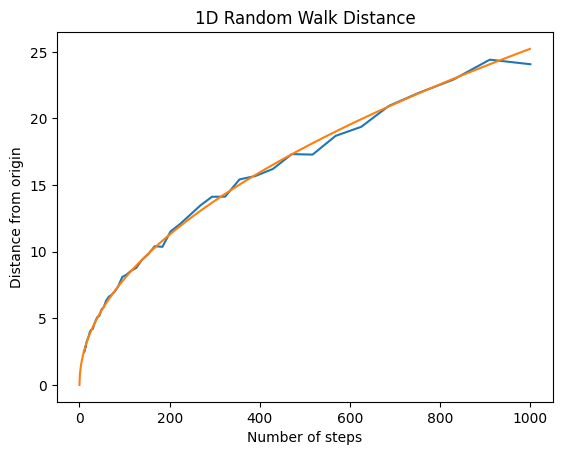

In [5]:
plt.plot(steps, walk_distance)
plt.plot([x for x in np.arange(1000)], [math.sqrt((2*x)/math.pi) for x in np.arange(1000)])
plt.title("1D Random Walk Distance")
plt.xlabel("Number of steps")
plt.ylabel("Distance from origin")

## 2D

The code should be roughly the same, but now our distance is not just the absolute value of the coordinates. Rather, it becomes the familiar $\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$. In general, for higher dimensions Euclidean distance is $\sqrt{\sum_{i=1}^n (q_i-q_i)^2}$ where $n$ is the number of dimensions. 

In [6]:
from matplotlib import cm
#a function to calculate average distance from the origin for a random walk of N steps
def twoD_walk_distance(number_of_steps: int, display_plot: bool) -> float:

    #intialize some values
    current_step = 0
    position = [0,0] #init position to the origin
    pos_history = [[0,0]]

    #pick a random direction and move that way
    while(current_step < number_of_steps):
        current_step += 1
        random_number = random.randint(0,3) #4DOF (0,1,2,3)

        if random_number == 0:
            position[0] += 1
        elif random_number == 1:
            position[1] += 1
        elif random_number == 2:
            position[0] -= 1
        elif random_number == 3:
            position[1] -= 1

        pos_history.append(position[:]) #store the new current position

        

    if(display_plot):
        #now plot it
        plt.axhline(y=0,color="black")
        plt.axvline(x=0,color="black")
        plt.plot([step_pos[0] for step_pos in pos_history], [step_pos[1] for step_pos in pos_history], color="red")

    #print(pos_history)
    #print("Distance upon termination is: %s" % abs(position))
    distance = math.sqrt(math.pow(position[0],2) + math.pow(position[1],2))
    return distance


In [7]:
def two_avg_distance(number_of_steps: int, number_of_trials:int) -> float:
    avg_dist = 0
    for run in np.arange(number_of_trials):
        avg_dist += twoD_walk_distance(number_of_steps,False)

    avg_dist = avg_dist / number_of_trials
    return avg_dist

    
number_of_steps = 1000 #1000
number_of_trials = 1000  #1000
#res = avg_distance(number_of_steps,number_of_trials)
#print("The average distance upon termination is: %s" % res)

logspacing = 50
#datax
steps = [int(step) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
#datay
walk_distance_2D = [two_avg_distance(int(step),number_of_trials) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]

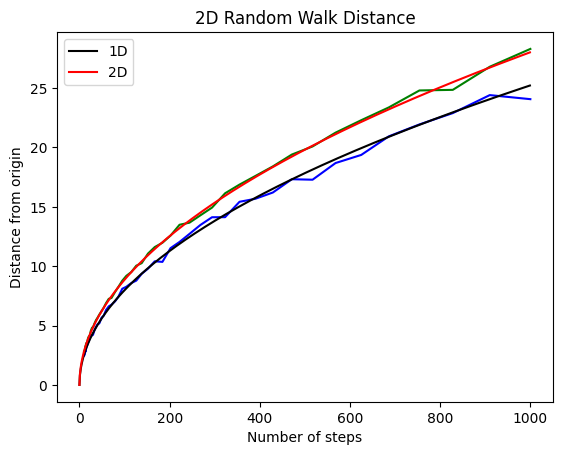

In [8]:
plt.plot(steps, walk_distance_2D, color="green")
plt.plot(steps, walk_distance, color="blue")
plt.plot([x for x in np.arange(1000)], [math.sqrt((2*x)/math.pi) for x in np.arange(1000)], color="black", label="1D")
plt.plot([x for x in np.arange(1000)], [math.sqrt(math.pi*x) / 2 for x in np.arange(1000)], color="red", label="2D")
plt.title("2D Random Walk Distance")
plt.xlabel("Number of steps")
plt.ylabel("Distance from origin")
plt.legend()

So the distance is a bit further than in 1D! In general the average distance is of the form $\text{distance} = \sqrt{\frac{2N}{d}} \frac{\Gamma(\frac{d+1}{2})}{\Gamma(\frac{d}{2})}$ where $d$ is dimension.

## 3D

In [9]:
#a function to calculate average distance from the origin for a random walk of N steps
def threeD_walk_distance(number_of_steps: int, display_plot: bool) -> float:

    #intialize some values
    current_step = 0
    position = [0,0,0] #init position to the origin
    pos_history = [[0,0,0]]

    #pick a random direction and move that way
    while(current_step < number_of_steps):
        current_step += 1
        random_number = random.randint(0,5) #6DOF (0,1,2,3,4,5)

        #posX
        if random_number == 0: 
            position[0] += 1
        #posY
        elif random_number == 1:
            position[1] += 1
        #negX
        elif random_number == 2:
            position[0] -= 1
        #negY
        elif random_number == 3:
            position[1] -= 1
        #posZ
        elif random_number == 4:
            position[2] += 1
        #negZ
        elif random_number == 5:
            position[2] -= 1

        pos_history.append(position[:]) #store the new current position

        

    if(display_plot):
        #now plot it
        ax = plt.figure().add_subplot(projection='3d')
        x = [step_pos[0] for step_pos in pos_history]
        y = [step_pos[1] for step_pos in pos_history]
        z = [step_pos[2] for step_pos in pos_history]

        ax.plot(x, y, z, color="red")
        ax.legend()

    #print("Distance upon termination is: %s" % abs(position))
    distance = math.sqrt(math.pow(position[0],2) + math.pow(position[1],2) + math.pow(position[2],2))
    return distance


In [10]:
def three_avg_distance(number_of_steps: int, number_of_trials:int) -> float:
    avg_dist = 0
    for run in np.arange(number_of_trials):
        avg_dist += threeD_walk_distance(number_of_steps,False)

    avg_dist = avg_dist / number_of_trials
    return avg_dist

    
number_of_steps = 1000 #1000
number_of_trials = 1000  #1000
#res = avg_distance(number_of_steps,number_of_trials)
#print("The average distance upon termination is: %s" % res)

logspacing = 50
#datax
steps = [int(step) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
#datay
walk_distance_3D = [three_avg_distance(int(step),number_of_trials) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]

In [11]:
#utility func to get correct scaling
def sqrt_scaling(dim: int) -> float:
    scaling = math.sqrt((2)/(dim)) * (math.gamma((dim+1)/2))/(math.gamma(dim/2))
    return scaling

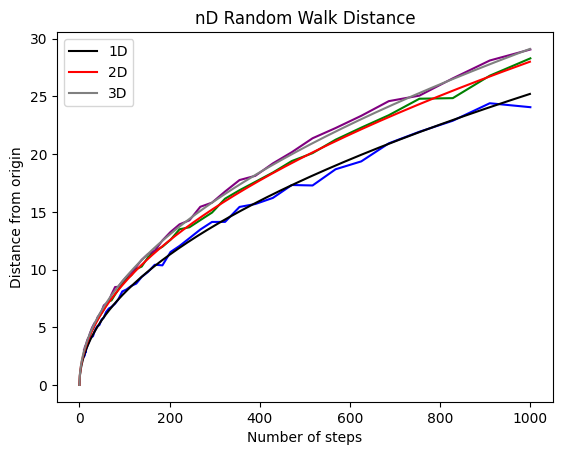

In [14]:
plt.plot(steps, walk_distance_2D, color="green")
plt.plot(steps, walk_distance, color="blue")
plt.plot(steps, walk_distance_3D, color="purple")
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(1)*math.sqrt(x) for x in np.arange(1000)], color="black", label="1D")
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(2)*math.sqrt(x) for x in np.arange(1000)], color="red", label="2D")
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(3)*math.sqrt(x) for x in np.arange(1000)], color="gray", label="3D")
plt.title("nD Random Walk Distance")
plt.xlabel("Number of steps")
plt.ylabel("Distance from origin")
plt.legend()

## nD

Here, we combine the functions for various dimensions into one

Create a utility function to pick a random direction

In [316]:
def pick_direction(dimension: int) -> tuple[int,int]:
    ''' Input: dimension
        Output: tuple containing index of coordinate to change and either 0/1 where 0 is for the positive direction and 1 is the negative direction
    '''
    random_number = random.uniform(0,1) #generate a random float between 0 and 1

    dof = 2*dimension #degrees of freedom
    #chop up the interval into 2*dim pieces and figure out which interval the random number is in. Then map each interval to a direction
    for i in range(1,(2*dimension)+1): #(+1 because we want to 1 index)????????////
        left_bound = (i-1)/dof
        right_bound = i/dof

        #now check what region the number is in
        if((random_number < right_bound) and (random_number > left_bound)):
            #move in the direction corresponding to i. EX: (1,+x),(2,-x),(3,+y),(4,-y),(5,+z),(6,-z). Here, odd values are positive and even are negative. 
            return (int((i-1)/2),(i-1)%2) #return (index to of coordinate to change, 0 if positve/1 if negative). Algebra going on. DEBUG:  return (i,int((i-1)/2),(i-1)%2)
        '''
        region 1: 0,(1/2dim)
        region 2: (1/2dim),(2/2dim)
        region 3: (2/2dim),(3/2dim)
        region 4: (3/2dim),(4/2dim)
        region 5: (4/2dim),(5/2dim)
        region 6: (5/2dim),(6/2dim)
         . . .
        region i: (i-1)/(2dim),(i)/(2dim)
        '''

    return "ERROR: no direction found"

Now we generalize the RW

In [644]:
#a function to calculate average distance from the origin for a rahdom walk (RW)
def rw(number_of_steps: int, dimension: int) -> float:
    ''' Input: number of steps to iterate and dimension of random walk space
        Output: Euclidean distance from origin upon termination
    '''

    current_step = 0

    #init position to the origin and store initial position in position history
    position = [] 
    for i in range(dimension):
        position.append(0)

    #pick a random direction and move that way
    while(current_step < number_of_steps):
        current_step += 1
        direction_tuple = pick_direction(dimension) 
        coord_index = direction_tuple[0]
        direction_to_move = direction_tuple[1]

        #update position coordinate
        if(direction_to_move == 0):
            position[coord_index] += 1
        else:
            position[coord_index] -= 1

    #calculate Euclidean distance
    distance_sum = 0
    for dim in range(dimension): #for each dimension in the space e.g x,y,z in R^3
        distance_sum += math.pow(position[dim],2)
    distance = math.sqrt(distance_sum)
    return distance


We also generalize the average distance function

In [645]:
def rw_avg_distance(number_of_steps: int, number_of_trials:int, dimension: int) -> float:
    avg_dist = 0
    for run in np.arange(number_of_trials):
        avg_dist += rw(number_of_steps,dimension)

    avg_dist = avg_dist / number_of_trials
    return avg_dist

Sanity check: are the trends the same? (recall the scaling is $\text{distance} = \sqrt{\frac{2N}{d}} \frac{\Gamma(\frac{d+1}{2})}{\Gamma(\frac{d}{2})}$ where $d$ is dimension.)

In [647]:
#utility func to get correct scaling
def sqrt_scaling(dim: int) -> float:
    scaling = math.sqrt((2)/(dim)) * (math.gamma((dim+1)/2))/(math.gamma(dim/2))
    return scaling

In [653]:
number_of_steps = 1000 #1000
number_of_trials = 1000  #1000

#calculate the average distances
logspacing = 50
#datax
steps = [int(step) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
#datay
dim_one = [rw_avg_distance(int(step),number_of_trials,1) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
dim_two = [rw_avg_distance(int(step),number_of_trials,2) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
dim_three = [rw_avg_distance(int(step),number_of_trials,3) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
dim_ten = [rw_avg_distance(int(step),number_of_trials,10) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]
dim_hundred = [rw_avg_distance(int(step),number_of_trials,100) for step in np.logspace(1,math.log10(number_of_steps),logspacing)]

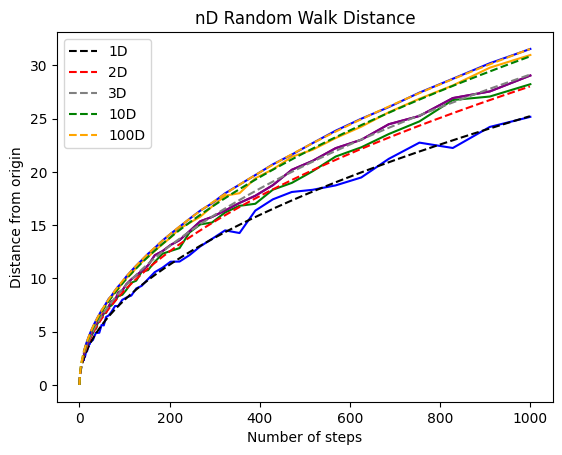

In [655]:
#plot them with the theory curves
plt.plot(steps, dim_one, color="blue") #1D data
plt.plot(steps, dim_two, color="green") #2D data
plt.plot(steps, dim_three, color="purple") #3D data
plt.plot(steps, dim_three, color="purple") #3D data
plt.plot(steps, dim_ten, color="orange") #10D data
plt.plot(steps, dim_hundred, color="blue") #100D data
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(1)*math.sqrt(x) for x in np.arange(1000)], color="black", label="1D", linestyle="dashed") #1D theory
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(2)*math.sqrt(x) for x in np.arange(1000)], color="red", label="2D", linestyle="dashed") #2D theory
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(3)*math.sqrt(x) for x in np.arange(1000)], color="gray", label="3D", linestyle="dashed") #3D theory
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(10)*math.sqrt(x) for x in np.arange(1000)], color="green", label="10D", linestyle="dashed") #10D theory
plt.plot([x for x in np.arange(1000)], [sqrt_scaling(100)*math.sqrt(x) for x in np.arange(1000)], color="orange", label="100D", linestyle="dashed") #100D theory
plt.title("nD Random Walk Distance")
plt.xlabel("Number of steps")
plt.ylabel("Distance from origin")
plt.legend()

So it works just like before, but much easier to use. Interestingly it seems like noise goes down as dimension goes up. My best guess for this is that it is statistically much less likely to pick a direction at random that backtracks in addition with the fact that there are fewer "directions that move directly towards or away from the origin." For example, in 1D you can either go towards or away from 0. In 2D if you have (0,0) -> (1,0) -> (1,1), the step from (1,0) to (1,1) moves neither directly towards or away from the origin. In higher dimensions, this continues so there is less "noise." In the limit of infinite dimenisons I expect the distance to go as $\sqrt{n}$.

## Non-reversal random walk (NRRW)

In 1D, NRRWs are trivial (since after the first step all other steps must be in the same direction). For higher dimensions, we can implement such a random walk by calculating a random direction to walk and only terminating this calculation when the direction picked does not lead back to the previous position. Therefore, we only need to store the previous position to implement at NRRW.

We can reuse the previous random walk code with only a slight modification. 

Finally, we add a NRRW using our new function